# This document present ways on how to create and explore models with dense,lsym and bilstm layers weights.

# I.Dense 

## I.1 imports:

In [ ]:
from tensorflow.keras import layers,models,activations
from tensorflow.keras.initializers import GlorotUniform, Orthogonal, Zeros
import tensorflow as tf
import numpy as np

## I.2 Model with simple dense layer

In [ ]:
def model1_with_one_layer(input_shape):
    i = layers.Input(shape=input_shape)
    o = layers.Dense(units=10, activation='softmax')(i)
    model = models.Model(inputs=i,outputs=o) # creating model
    print("input layer",model.layers[0])
    print("dense layer",model.layers[1])
    return model

model1 = model1_with_one_layer((20,20))
model1.summary()

### example of how to get layers and weights

In [ ]:
print(f"The number of layers: {len(model1.layers)}")
print("input layer",model1.layers[0])
print("dense layer",model1.layers[1])

### input

In [ ]:
input_weights = model1.layers[0] # input layer always without weights 
input_weights.get_weights()

### output / dense(10)

In [50]:
dense_weights = model1.layers[1] # input layer always without weights 
len(dense_weights.get_weights()) #  because : (y = vector*w + b)

2

In [51]:
weights_of_output_layer = dense_weights.get_weights()[0]
print(f"the shape of weights between the input and the output {weights_of_output_layer.shape}")

the shape of weights between the input and the output (20, 128)


In [52]:
bias_of_output = dense_weights.get_weights()[1]
print(f"the shape of weights between the input and the output {bias_of_output.shape}")
bias_of_output

the shape of weights between the input and the output (128,)


array([ 0.        , -0.00099992,  0.00099996,  0.00099997,  0.        ,
        0.        ,  0.00099988,  0.00099993,  0.        , -0.00099998,
        0.        ,  0.00099997,  0.        , -0.00099996,  0.        ,
        0.        ,  0.        ,  0.00099997,  0.        ,  0.        ,
        0.        , -0.00099926,  0.        ,  0.        ,  0.00099997,
        0.        ,  0.        ,  0.        , -0.00099994, -0.00099997,
        0.        ,  0.00099994, -0.00099998,  0.        ,  0.        ,
       -0.00099996,  0.        , -0.00099993, -0.00099981,  0.00099997,
        0.00099997,  0.        ,  0.00099995,  0.        ,  0.        ,
       -0.00099992,  0.00099997, -0.00099996,  0.00099994,  0.        ,
        0.        ,  0.0009998 , -0.00099998, -0.00099997,  0.        ,
       -0.00099937,  0.        ,  0.00099997, -0.00099995,  0.        ,
        0.00099993,  0.00099992,  0.        ,  0.        ,  0.        ,
        0.        , -0.00099997,  0.        ,  0.        ,  0.00

In [53]:
def model1_with_two_layers(input_shape):
    i = layers.Input(shape=input_shape,name='input')
    hidden = layers.Dense(units=128,activation='relu',name='hidden')(i)
    o = layers.Dense(units=10, activation='softmax',name='output')(hidden)
    model = models.Model(inputs=i,outputs=o) # creating model
    return model

model1 = model1_with_two_layers((20,))
model1.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
hidden_layer = model1.get_layer('hidden') # get layer by his name
w1 = hidden_layer.get_weights()[0]
bias1 = hidden_layer.get_weights()[1]
print(len(hidden_layer.get_weights()))
print("the shape of weights of hidden layer:",w1.shape) # weights
print("the shape of bias :",bias1.shape) # bias

2
the shape of weights of hidden layer: (20, 128)
the shape of bias : (128,)


In [55]:
output_layer = model1.get_layer('output') # get layer by his name
len(output_layer.get_weights())
w2 = output_layer.get_weights()[0]
bias2 = output_layer.get_weights()[1]
print(len(output_layer.get_weights()))
print("the shape of output layer weights:",w2.shape)
print("the shape of output layer bias:",bias2.shape)

2
the shape of output layer weights: (128, 10)
the shape of output layer bias: (10,)


In [56]:
vector = np.random.rand(20)
vector

array([0.56132412, 0.78583043, 0.59298155, 0.43708478, 0.95471595,
       0.45719143, 0.84828952, 0.85562648, 0.3360214 , 0.50226727,
       0.21722568, 0.60222663, 0.14157395, 0.14191945, 0.66920019,
       0.56711185, 0.54742883, 0.65506933, 0.24348712, 0.07416068])

In [57]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vector = np.random.rand(1, 20)  # Add batch dimension, shape is (1, 20)
print("Input vector:", vector)

labels = np.random.randint(0, 10, size=(1,))  # Random integer label for 1 class
print("Integer labels:", labels)

labels = np.eye(10)[labels]  # Convert to one-hot encoding
print("One-hot encoded labels:", labels)

# Fit the model
model1.fit(vector, labels, epochs=1, verbose=1)

Input vector: [[2.82588673e-04 2.22087146e-01 1.08633052e-01 2.43215704e-01
  3.98882067e-01 3.71089552e-01 4.05801310e-01 7.75275213e-01
  5.73760765e-01 7.91181112e-01 5.19308917e-02 4.24041183e-01
  1.92331604e-01 3.78244662e-01 9.81069872e-01 7.61858690e-01
  8.30971113e-01 7.09895975e-01 9.36005898e-01 7.43223232e-01]]
Integer labels: [8]
One-hot encoded labels: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step - accuracy: 0.0000e+00 - loss: 2.1589


In [58]:
vector_test=np.random.rand(1,20)

In [59]:
prediction=model1.predict(vector_test)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[0.13638549, 0.09602848, 0.09621544, 0.0750329 , 0.12113275,
        0.0666419 , 0.08635799, 0.09654622, 0.12549387, 0.10016495]],
      dtype=float32)

### Simulation de senario de prediction

In [60]:
# result_layer_1= vector_test*w1 +b1  
# output = result_layer_1*w2 +b2
w1 = model1.layers[1].get_weights()[0]
b1 = model1.layers[1].get_weights()[1]
relu_activation=layers.Activation('relu')
print(vector_test.shape, "*",w1.shape ,"+", b1.shape,"=")
result_layer_1 = relu_activation(np.dot(vector_test,w1) + b1)
print(result_layer_1.shape)

(1, 20) * (20, 128) + (128,) =
(1, 128)


In [61]:
w2 = model1.layers[2].get_weights()[0]
b2 = model1.layers[2].get_weights()[1]
softmax_activation = layers.Activation('softmax')
print(result_layer_1.shape, "*",w2.shape ,"+", b2.shape,"=")
output = softmax_activation(np.dot(result_layer_1,w2) + b2)
print(output.shape)

(1, 128) * (128, 10) + (10,) =
(1, 10)


### Comparing results

In [62]:
prediction,output

(array([[0.13638549, 0.09602848, 0.09621544, 0.0750329 , 0.12113275,
         0.0666419 , 0.08635799, 0.09654622, 0.12549387, 0.10016495]],
       dtype=float32),
 <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[0.13638549, 0.09602848, 0.09621545, 0.0750329 , 0.12113275,
         0.0666419 , 0.086358  , 0.09654622, 0.12549387, 0.10016495]],
       dtype=float32)>)

# II.LSTM

In [63]:
def create_model_with_lstm(input_shape):
    i = layers.Input(shape=input_shape)
    lstm1 = layers.LSTM(units=32)(i)
    o = layers.Dense(units=10,activation='softmax',name='output')(lstm1)
    model = models.Model(inputs=i,outputs=o)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model2 = create_model_with_lstm((100,20))
model2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 100, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,114 (27.79 KB)

 Trainable params: 7,114 (27.79 KB)

 Non-trainable params: 0 (0.00 B)

### Training:

In [64]:
np.random.rand()

0.8561086774531177

In [65]:
X_test = np.random.rand(100,20).reshape((1,100,20))
print('X test shape:',X_test.shape)
class_value = np.random.randint(0,10,(1,))
Y_test = np.eye(10)[class_value]
print('Y test:',Y_test)

X test shape: (1, 100, 20)
Y test: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [66]:
tf.shape(X_test)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([  1, 100,  20], dtype=int32)>

In [67]:
model2.fit(X_test,Y_test,epochs=10,verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.6270
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 2.5178
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 2.4098
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 2.3036
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 2.1997
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 2.0982
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 1.9989
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 1.9020
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 1.8076
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 1.7159


In [68]:
pred = model2.predict(X_test)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.14719906, 0.12806135, 0.10799527, 0.06725932, 0.08098698,
        0.05382935, 0.06300621, 0.06719995, 0.0879394 , 0.19652312]],
      dtype=float32)

In [69]:
lstm_res = model2.layers[1](X_test)
dense_res = model2.layers[2](lstm_res)
dense_res.numpy()

array([[0.14719906, 0.12806135, 0.10799527, 0.06725932, 0.08098698,
        0.05382935, 0.06300621, 0.06719995, 0.0879394 , 0.19652312]],
      dtype=float32)

In [70]:
lstm_weights = model2.layers[1].get_weights()

In [71]:
len(lstm_weights)

3

In [72]:
Us = lstm_weights[0]
Ws = lstm_weights[1]
bs = lstm_weights[2]
Us.shape , Ws.shape , bs.shape

((20, 128), (32, 128), (128,))

### Explanation of the shapes:

In [73]:
# (20,128) = (nb_columns,4*nb_lstm_units)  : (Us) input weights
# (32,128) = (nb_columns,4*nb_lstm_units)  : (Ws) hidden weights (32 units for forget_gate,32 units for input_gate,32 units candidate_gate, 32 units for output_gate)
# (128,) = (4*nb_lstm_units,)    :bias  (32 units for forget_gate,32 units for input_gate,32 units candidate_gate, 32 units for output_gate)

* 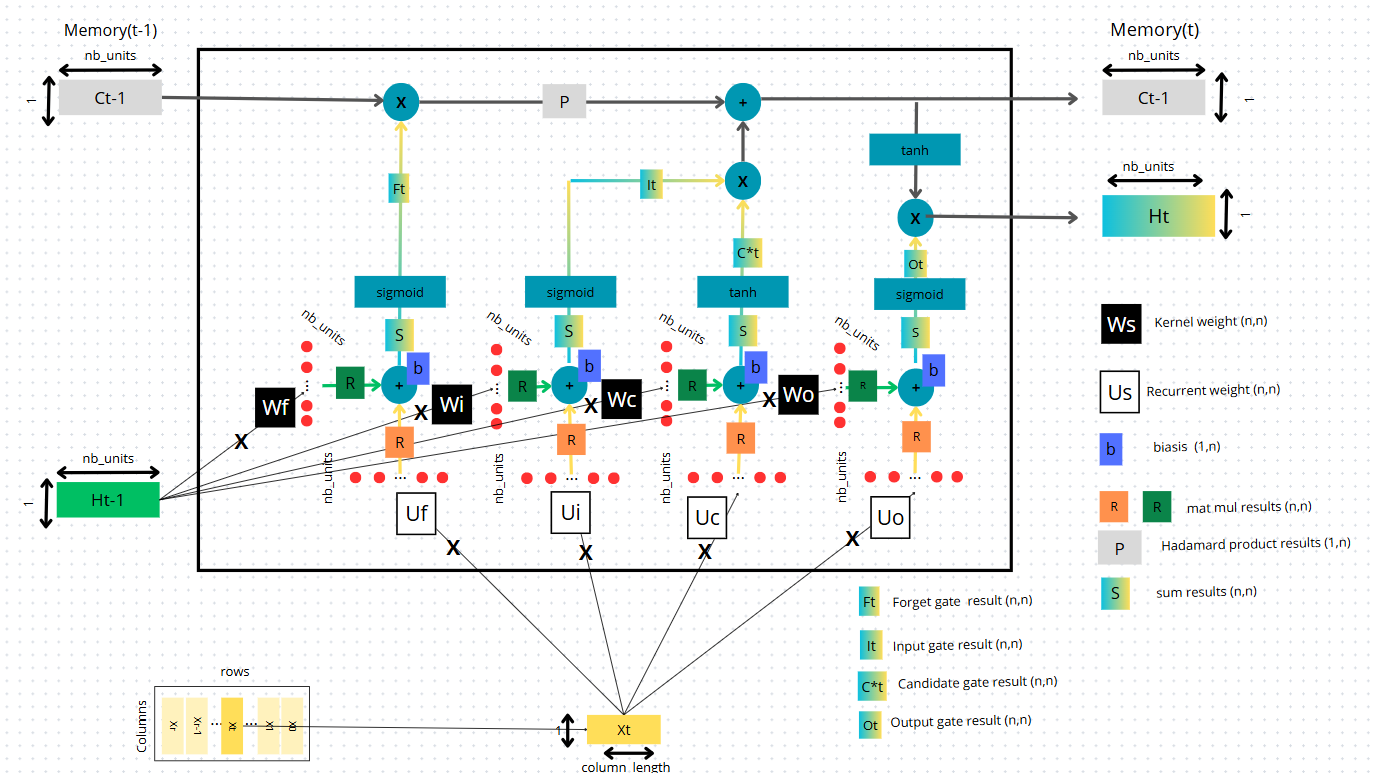

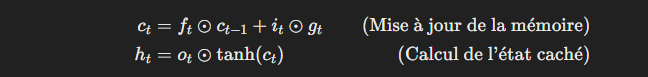

In [74]:
# Uf: matrix(x_len,nb_units) : weights of forget_gate for xt
# Ui: matrix(x_len,nb_units) : weights of input_gate for xt
# Uc: matrix(x_len,nb_units) : weights of candidate_gate for xt
# Uo: matrix(x_len,nb_units) : weights of output_gate for xt

# Wf: matrix(nb_units,nb_units) : weights of forget_gate for ht-1
# Wi: matrix(nb_units,nb_units) : weights of input_gate for ht-1
# Wc: matrix(nb_units,nb_units) : weights of candidate_gate for ht-1
# Wo: matrix(nb_units,nb_units) : weights of output_gate for ht-t

# bf: matrix(1,nb_units) : bias of forget_gate
# bi: matrix(1,nb_units) : bias of input_gate 
# bc: matrix(1,nb_units) : bias of candidate_gate
# bo: matrix(1,nb_units) : bias of output_gate

In [75]:
Uf = Us[:,:32*1]
Ui = Us[:,32*1:32*2]
Uc = Us[:,32*2:32*3]
Uo = Us[:,32*3:]

In [76]:
Wf = Ws[:,:32*1]
Wi = Ws[:,32*1:32*2]
Wc = Ws[:,32*2:32*3]
Wo = Ws[:,32*3:]

In [77]:
bf = bs[:32*1]
bi = bs[32*1:32*2]
bc = bs[32*2:32*3]
bo = bs[32*3:]

In [78]:
# init
t=0
h0 = np.zeros((32,1))
xt = X_test[0][t]
ht=h0


ctp = np.zeros((1,32))
sigmoid_fn=layers.Activation('sigmoid')
tanh_fn=layers.Activation('tanh')

In [79]:
tf.shape(X_test)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([  1, 100,  20], dtype=int32)>

In [80]:
ctp

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [81]:
np.dot(xt,Uf).shape

(32,)

In [82]:
(np.dot(Wf,ht).T+np.dot(Uf.T,xt.T)).shape

(1, 32)

In [83]:
test_lstm1=layers.LSTM(units=32,return_sequences=False)
print(test_lstm1(np.random.rand(1,10,20)).numpy().shape)
test_lstm2=layers.LSTM(units=32,return_sequences=True)
print(test_lstm2(np.random.rand(1,10,20)).numpy().shape)

(1, 32)
(1, 10, 32)


In [84]:
# init
t=0
h0 = np.zeros((1,32))
x0 = X_test[0][t]
ht=h0
activation=tf.nn.tanh
recurrent_activation=tf.nn.sigmoid
def forget_gate(wf,uf,bf,hidden_state,xt):
    return recurrent_activation(tf.matmul(hidden_state,wf) + tf.matmul(xt,uf) +bf)

def input_gate(wi,ui,bi,hidden_state,xt):
    return recurrent_activation(tf.matmul(hidden_state,wi) + tf.matmul(xt,ui) +bi)

def candidate_gate(wc,uc,bc,hidden_state,xt):
    return activation(tf.matmul(hidden_state ,wc) + tf.matmul(xt ,uc) + bc)

def output_gate(wo,uo,bo,hidden_state,xt):
    return recurrent_activation(tf.matmul(hidden_state,wo) + tf.matmul(xt,uo) +bo)

def memory_c(ctp,res_forget,res_input,res_candidate):
    return ctp*res_forget + res_input*res_candidate
    
def h(res_memory,res_output):
    return tanh_fn(res_memory).numpy()*res_output

In [85]:
# print(forget_gate(Wf,Uf,bi,ht,xt).shape)
# print(input_gate(Wi,Ui,bf,ht,xt).shape)
# print(candidate_gate(Wc,Uc,bc,ht,xt).shape)
# print(output_gate(Wo,Uo,bo,ht,xt).shape)

# res_forget = forget_gate(Wi,Ui,bi,ht,xt)
# res_input = input_gate(Wf,Uf,bf,ht,xt)
# res_candidate = candidate_gate(Wc,Uc,bc,ht,xt)
# res_output = output_gate(Wo,Uo,bo,ht,xt)
# res_memory= memory_c(ctp,res_forget,res_input,res_candidate)
# res_h=h(res_memory,res_output)

In [87]:
h0 = np.zeros((1,32))
ctp = np.zeros((1,32))
ht=h0
for t in range(100):
    xt = X_test[:,t,:]
    res_forget = forget_gate(Wf,Uf,bf,ht,xt)
    res_input = input_gate(Wi,Ui,bi,ht,xt)
    res_candidate = candidate_gate(Wc,Uc,bc,ht,xt)
    res_output = output_gate(Wo,Uo,bo,ht,xt)
    ctp = memory_c(ctp,res_forget,res_input,res_candidate)
    ht = h(ctp,res_output)

In [88]:
ht

<tf.Tensor: shape=(1, 32), dtype=float64, numpy=
array([[ 0.19341586,  0.47363564,  0.04262679, -0.38188718, -0.09813217,
         0.04467538, -0.25719163,  0.26278116, -0.02779398,  0.1830036 ,
         0.09614454, -0.26950916,  0.15714412, -0.30030524, -0.1191888 ,
         0.45618881,  0.37545747, -0.10296118, -0.18952206,  0.2643237 ,
         0.27004066, -0.08387784, -0.13166589,  0.00382932,  0.16151659,
         0.31800318,  0.11104195,  0.29415611, -0.41984341,  0.1922423 ,
        -0.21118037,  0.01286744]])>

In [89]:
dense_res.numpy()

array([[0.14719906, 0.12806135, 0.10799527, 0.06725932, 0.08098698,
        0.05382935, 0.06300621, 0.06719995, 0.0879394 , 0.19652312]],
      dtype=float32)

In [90]:
model2.layers[2](ht).numpy()

array([[0.14122614, 0.11074711, 0.1067438 , 0.08468823, 0.07986518,
        0.07032746, 0.07757099, 0.07502318, 0.0865725 , 0.16723543]],
      dtype=float32)

##### res_h.shape

In [91]:
np.round(ht,3)

array([[ 0.193,  0.474,  0.043, -0.382, -0.098,  0.045, -0.257,  0.263,
        -0.028,  0.183,  0.096, -0.27 ,  0.157, -0.3  , -0.119,  0.456,
         0.375, -0.103, -0.19 ,  0.264,  0.27 , -0.084, -0.132,  0.004,
         0.162,  0.318,  0.111,  0.294, -0.42 ,  0.192, -0.211,  0.013]])

In [92]:
dense2 = model2.get_layer('output') 
dense2(ht)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.14122614, 0.11074711, 0.1067438 , 0.08468823, 0.07986518,
        0.07032746, 0.07757099, 0.07502318, 0.0865725 , 0.16723543]],
      dtype=float32)>

## lstm layer from scratch

In [131]:
import tensorflow as tf
class MyLSTM(layers.Layer):
    def __init__(self,nb_units,return_sequences=False):
        super(MyLSTM,self).__init__()
        self.nb_units=nb_units
        self.return_sequences=return_sequences
        self.activation=tf.nn.tanh
        self.recurrent_activation=tf.nn.sigmoid
        self.batch_size = 1
        self.timesteps = 20
        self.features = 100

    def build(self,input_shape):
        self.wf = self.add_weight(shape=(self.nb_units,self.nb_units),dtype="float32")
        self.wi = self.add_weight(shape=(self.nb_units,self.nb_units),dtype="float32")
        self.wc = self.add_weight(shape=(self.nb_units,self.nb_units),dtype="float32")
        self.wo = self.add_weight(shape=(self.nb_units,self.nb_units),dtype="float32")

        self.uf = self.add_weight(shape=(input_shape[-1],self.nb_units),dtype="float32")
        self.ui = self.add_weight(shape=(input_shape[-1],self.nb_units),dtype="float32")
        self.uc = self.add_weight(shape=(input_shape[-1],self.nb_units),dtype="float32")
        self.uo = self.add_weight(shape=(input_shape[-1],self.nb_units),dtype="float32")

        self.bf = self.add_weight(shape=(self.nb_units,),dtype="float32")
        self.bi = self.add_weight(shape=(self.nb_units,),dtype="float32")
        self.bc = self.add_weight(shape=(self.nb_units,),dtype="float32")
        self.bo = self.add_weight(shape=(self.nb_units,),dtype="float32")

        self.hidden_state= tf.zeros((self.batch_size,self.nb_units),dtype="float32")
        self.memory = tf.zeros((self.batch_size,self.nb_units),dtype="float32")
        print('building..')

    def get_hidden_state(self):
        print('hidden_state')
        print( self.hidden_state)
        return self.hidden_state

    def get_memory(self):
        return self.memory
        
    def call(self, inputs):

        print('calling..')

        self.hidden_state=np.zeros((self.batch_size,self.nb_units),dtype="float32")
        self.memory=np.zeros((self.batch_size,self.nb_units),dtype="float32")
        for timestep in range(self.timesteps):
            x_t = inputs[:, timestep, :]  # Shape: (batch_size, features)
            f = self.recurrent_activation(tf.matmul(self.hidden_state,self.wf) + tf.matmul(x_t,self.uf) + self.bf)
            i = self.recurrent_activation(tf.matmul(self.hidden_state,self.wi) + tf.matmul(x_t,self.ui) + self.bi)
            c = self.activation(tf.matmul(self.hidden_state ,self.wc) + tf.matmul(x_t ,self.uc) + self.bc)
            o = self.recurrent_activation(tf.matmul(self.hidden_state,self.wo) + tf.matmul(x_t ,self.uo) + self.bo)

            self.memory = self.memory*f + i*c 
            self.hidden_state =self.activation(self.memory)*o

        return self.hidden_state
        


In [132]:
def create_model_with_custom_lstm(input_shape):
    i = layers.Input(shape=input_shape)
    lstm1 = MyLSTM(nb_units=32)(i)
    o = layers.Dense(units=10,activation='softmax',name='output')(lstm1)
    model = models.Model(inputs=i,outputs=o)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model3 = create_model_with_custom_lstm((100,20))
model3.summary()

building..
calling..


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 100, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_lstm_6 (MyLSTM)              │ (None, 32)             │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,114 (27.79 KB)

 Trainable params: 7,114 (27.79 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
model3.fit(X_test,Y_test,epochs=10)

Epoch 1/10
calling..
calling..
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.0000e+00 - loss: 2.5318
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 2.4781
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 2.4251
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 2.3728
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 2.3211
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 2.2698
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 2.2189
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 2.1682
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 2.1176
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 2.0670


In [134]:
model3.layers[1].get_hidden_state()

hidden_state
Tensor("functional_21_1/my_lstm_6_1/mul_59:0", shape=(None, 32), dtype=float32)


<tf.Tensor 'functional_21_1/my_lstm_6_1/mul_59:0' shape=(None, 32) dtype=float32>

In [135]:
model3.layers[1].get_weights()[0]

array([[ 0.11693363, -0.1456951 ,  0.16792382, ..., -0.12221457,
         0.1461517 ,  0.27333528],
       [ 0.23379746,  0.17961845,  0.18241994, ...,  0.1870855 ,
        -0.28481838,  0.24855077],
       [-0.20113751, -0.19976062,  0.22151585, ...,  0.2133495 ,
        -0.08740471, -0.01507838],
       ...,
       [ 0.09838761, -0.19400519,  0.23795724, ..., -0.10120204,
        -0.02993231, -0.17663535],
       [ 0.15799479, -0.14143555, -0.2928925 , ...,  0.00306844,
         0.07480723,  0.10149729],
       [ 0.06897666, -0.17422754, -0.22250125, ...,  0.1486159 ,
         0.07064434, -0.20311698]], dtype=float32)

In [136]:
model3.predict(X_test)

calling..
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.08001623, 0.10555826, 0.07515644, 0.09821992, 0.07025459,
        0.10020331, 0.12570415, 0.10004672, 0.11168034, 0.13316005]],
      dtype=float32)

In [137]:
model3.layers[1].get_weights()[0]

array([[ 0.11693363, -0.1456951 ,  0.16792382, ..., -0.12221457,
         0.1461517 ,  0.27333528],
       [ 0.23379746,  0.17961845,  0.18241994, ...,  0.1870855 ,
        -0.28481838,  0.24855077],
       [-0.20113751, -0.19976062,  0.22151585, ...,  0.2133495 ,
        -0.08740471, -0.01507838],
       ...,
       [ 0.09838761, -0.19400519,  0.23795724, ..., -0.10120204,
        -0.02993231, -0.17663535],
       [ 0.15799479, -0.14143555, -0.2928925 , ...,  0.00306844,
         0.07480723,  0.10149729],
       [ 0.06897666, -0.17422754, -0.22250125, ...,  0.1486159 ,
         0.07064434, -0.20311698]], dtype=float32)

In [138]:
custom_lstm_resutl=model3.layers[1](X_test)
dense = model3.layers[2](custom_lstm_resutl)
dense.numpy()

calling..


array([[0.08001623, 0.10555826, 0.07515643, 0.09821991, 0.07025458,
        0.10020331, 0.12570415, 0.10004672, 0.11168034, 0.13316004]],
      dtype=float32)

In [144]:
Wf = custom_lstm_weights[0]
Wi = custom_lstm_weights[1]
Wc = custom_lstm_weights[2]
Wo = custom_lstm_weights[3]

Uf = custom_lstm_weights[4]
Ui = custom_lstm_weights[5]
Uc = custom_lstm_weights[6]
Uo = custom_lstm_weights[7]

bf = custom_lstm_weights[8]
bi = custom_lstm_weights[9]
bc = custom_lstm_weights[10]
bo = custom_lstm_weights[11]

In [146]:
ht = model3.layers[1].get_hidden_state().numpy()
ht

hidden_state
tf.Tensor(
[[ 0.27745944 -0.17006858 -0.2471946   0.15778032  0.47785845 -0.15600199
  -0.01309547 -0.01435301 -0.11413102 -0.19654532  0.02990844 -0.26525465
   0.28871298  0.10627028  0.14490777  0.23802659  0.01575612  0.21566314
  -0.07830948 -0.25236323  0.18708286  0.14255519  0.3505416   0.06628249
   0.09725831  0.03140689  0.169685    0.15541187 -0.04677318 -0.0050085
   0.17218897  0.2836588 ]], shape=(1, 32), dtype=float32)


array([[ 0.27745944, -0.17006858, -0.2471946 ,  0.15778032,  0.47785845,
        -0.15600199, -0.01309547, -0.01435301, -0.11413102, -0.19654532,
         0.02990844, -0.26525465,  0.28871298,  0.10627028,  0.14490777,
         0.23802659,  0.01575612,  0.21566314, -0.07830948, -0.25236323,
         0.18708286,  0.14255519,  0.3505416 ,  0.06628249,  0.09725831,
         0.03140689,  0.169685  ,  0.15541187, -0.04677318, -0.0050085 ,
         0.17218897,  0.2836588 ]], dtype=float32)

In [150]:
model3.layers[1](X_test)

calling..


<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[ 0.27745944, -0.17006858, -0.2471946 ,  0.15778032,  0.47785845,
        -0.15600199, -0.01309547, -0.01435301, -0.11413102, -0.19654532,
         0.02990844, -0.26525465,  0.28871298,  0.10627028,  0.14490777,
         0.23802659,  0.01575612,  0.21566314, -0.07830948, -0.25236323,
         0.18708286,  0.14255519,  0.3505416 ,  0.06628249,  0.09725831,
         0.03140689,  0.169685  ,  0.15541187, -0.04677318, -0.0050085 ,
         0.17218897,  0.2836588 ]], dtype=float32)>

In [148]:
X_test2 =np.random.rand(100,20).reshape((1,100,20))

In [151]:
model3.layers[1](X_test2)

calling..


<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[ 0.19784366, -0.07191465, -0.25185832,  0.17652446,  0.49654865,
        -0.09886443,  0.04846672, -0.0330312 , -0.1333459 , -0.18286133,
         0.0904623 , -0.27260885,  0.2809226 ,  0.06836414,  0.20052609,
         0.22061148,  0.2513213 ,  0.2074159 ,  0.04540874, -0.31652042,
         0.37556982,  0.12541391,  0.34430587,  0.12581676, -0.01918732,
        -0.01801886,  0.1772645 ,  0.03731987,  0.05121218, -0.0099095 ,
         0.22528605,  0.23165473]], dtype=float32)>

In [143]:
h0 = np.zeros((1,32),dtype="double")
ctp = np.zeros((1,32),dtype="double")
ht=h0
for t in range(100):
    xt = X_test[:,t,:]
    res_forget = forget_gate(Wf,Uf,bf,ht,xt)
    res_input = input_gate(Wi,Ui,bi,ht,xt)
    res_candidate = candidate_gate(Wc,Uc,bc,ht,xt)
    res_output = output_gate(Wo,Uo,bo,ht,xt)
    ctp= memory_c(ctp,res_forget,res_input,res_candidate)
    ht=h(ctp,res_output)

In [ ]:
ht

In [ ]:
dense2=model3.layers[2](ht)
dense2.numpy()

In [ ]:
seq = model3.layers[1](X_test)
seq

In [ ]:
ht

In [ ]:
seq = model3.layers[1](X_test)
dense2 = model3.get_layer('output') 
layers.Activation('softmax')(dense2(seq).numpy())

In [ ]:
layers.Activation('softmax')(dense2(ht))

In [ ]:
model3.predict(X_test)